In [8]:
import bagpy
from bagpy import bagreader

import PIL
from PIL import Image

from pathlib import Path

import pandas as pd

In [10]:
directory_path = Path('/Users/dsikdar/Documents/UCI_MAIN/CLUBS/QC@UCI_Club/GroupProject/Dataset/')
list_of_bag_files = list(directory_path.glob('**/*.bag'))
#for bag_file_path in list_of_bag_files:
#    print(bag_file_path)

/Users/dsikdar/Documents/UCI_MAIN/CLUBS/QC@UCI_Club/GroupProject/Dataset/HMB_5.bag
/Users/dsikdar/Documents/UCI_MAIN/CLUBS/QC@UCI_Club/GroupProject/Dataset/HMB_4.bag
/Users/dsikdar/Documents/UCI_MAIN/CLUBS/QC@UCI_Club/GroupProject/Dataset/HMB_6.bag
/Users/dsikdar/Documents/UCI_MAIN/CLUBS/QC@UCI_Club/GroupProject/Dataset/HMB_2.bag
/Users/dsikdar/Documents/UCI_MAIN/CLUBS/QC@UCI_Club/GroupProject/Dataset/HMB_1.bag


In [13]:
dict_of_bagreaders = {'b'+str(i+1): bagreader(str(list_of_bag_files[i])) for i in range(len(list_of_bag_files))}
for key in dict_of_bagreaders:
    print(key, dict_of_bagreaders[key])

[INFO]  Successfully created the data folder /Users/dsikdar/Documents/UCI_MAIN/CLUBS/QC@UCI_Club/GroupProject/Dataset/HMB_5.
[INFO]  Successfully created the data folder /Users/dsikdar/Documents/UCI_MAIN/CLUBS/QC@UCI_Club/GroupProject/Dataset/HMB_4.
[INFO]  Successfully created the data folder /Users/dsikdar/Documents/UCI_MAIN/CLUBS/QC@UCI_Club/GroupProject/Dataset/HMB_6.
[INFO]  Successfully created the data folder /Users/dsikdar/Documents/UCI_MAIN/CLUBS/QC@UCI_Club/GroupProject/Dataset/HMB_2.
[INFO]  Successfully created the data folder /Users/dsikdar/Documents/UCI_MAIN/CLUBS/QC@UCI_Club/GroupProject/Dataset/HMB_1.
b1 <bagpy.bagreader.bagreader object at 0x7f92ab55b6a0>
b2 <bagpy.bagreader.bagreader object at 0x7f92064b2b50>
b3 <bagpy.bagreader.bagreader object at 0x7f920ce2f130>
b4 <bagpy.bagreader.bagreader object at 0x7f922741bb80>
b5 <bagpy.bagreader.bagreader object at 0x7f91b8babbb0>


In [6]:
b.topic_table

,Topics,Types,Message Count,Frequency
0,/can_bus_dbw/can_rx,dataspeed_can_msgs/CanMessageStamped,156900,1104.927292
1,/center_camera/camera_info,sensor_msgs/CameraInfo,4401,19.996491
2,/center_camera/image_color/compressed,sensor_msgs/CompressedImage,4401,19.996110
3,/diagnostics,diagnostic_msgs/DiagnosticArray,868,5.206926
4,/ecef/,geometry_msgs/PointStamped,88474,401.830236
5,/fix,sensor_msgs/NavSatFix,88473,401.714778
6,/imu/data,sensor_msgs/Imu,88472,401.368804
7,/left_camera/camera_info,sensor_msgs/CameraInfo,4401,19.997063
8,/left_camera/image_color/compressed,sensor_msgs/CompressedImage,4401,19.997874
9,/pressure,sensor_msgs/FluidPressure,11059,49.988725


In [7]:
CAMERA_MSG = b.message_by_topic('/center_camera/image_color/compressed')
camera_data = pd.read_csv(CAMERA_MSG)

camera_data.head()

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,format,data
0,1.479424e+09,59062,1479424215,880976321,center_camera,bgr8; jpeg compressed bgr8,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
1,1.479424e+09,59063,1479424215,930775951,center_camera,bgr8; jpeg compressed bgr8,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
2,1.479424e+09,59064,1479424215,980916687,center_camera,bgr8; jpeg compressed bgr8,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
3,1.479424e+09,59065,1479424216,30737492,center_camera,bgr8; jpeg compressed bgr8,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
4,1.479424e+09,59066,1479424216,80827865,center_camera,bgr8; jpeg compressed bgr8,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...


In [55]:
byte_string = camera_data['data'][100]
byte_string = bytes(byte_string, encoding='utf-8')
#byte_string = byte_string.decode(encoding='utf-8', errors='strict')


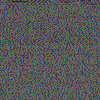

In [56]:
img = Image.frombytes("RGB", (100, 100), byte_string)
img